In [1]:
import numpy as np
import scipy
from time import time
import seaborn as sns

In [2]:
A = np.random.randint(1,5,size=(4,4))
A, np.linalg.eig(A)

(array([[4, 3, 3, 3],
        [1, 1, 1, 4],
        [2, 2, 3, 1],
        [4, 3, 4, 3]]),
 (array([10.62660855+0.j        ,  1.        +0.j        ,
         -0.31330428+0.74870838j, -0.31330428-0.74870838j]),
  array([[ 6.00065331e-01+0.j        ,  7.07106781e-01+0.j        ,
          -2.51565880e-01-0.16634078j, -2.51565880e-01+0.16634078j],
         [ 3.59488469e-01+0.j        ,  7.08801456e-16+0.j        ,
           8.61537760e-01+0.j        ,  8.61537760e-01-0.j        ],
         [ 3.34440253e-01+0.j        , -7.07106781e-01+0.j        ,
          -3.17809267e-01-0.03529203j, -3.17809267e-01+0.03529203j],
         [ 6.31537296e-01+0.j        , -4.77077903e-16+0.j        ,
          -1.40521520e-01+0.21166834j, -1.40521520e-01-0.21166834j]])))

In [3]:
def check_eig(A, value, vector):
    assert np.linalg.norm(A@vector - value*vector)<1e-5*len(A)

### Zadanie 1

In [10]:
def power_iteration(A, iters=10**2, epsilon=1e-5):
    v = np.random.rand(A.shape[1])

    for _ in range(iters):
        v /= np.max(v)
        
        new_v = A@v
        if np.linalg.norm(new_v-v)<epsilon:
            break
        else:
            v = new_v

    return np.abs(v).max(), v / np.linalg.norm(v)

val, vec = power_iteration(A)
check_eig(A, value=val, vector=vec)
val, vec

(7248.483198951282,
 array([0.02562787, 0.02657755, 0.02607693, ..., 0.02652801, 0.02670195,
        0.02655866]))

<AxesSubplot:xlabel='Matrix size', ylabel='Time (s)'>

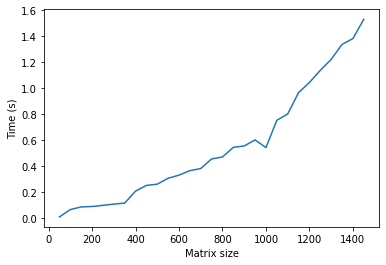

In [12]:
Y = []
X = []
for n in range(50,1500,50):
    start = time()
    A = np.random.randint(1,10,size=(n,n))
    val, vec = power_iteration(A)
    check_eig(A, value=val, vector=vec)
    
    Y.append(time()-start)
    X.append(n)
fig = sns.lineplot(x=X, y=Y)
fig.set_xlabel('Matrix size')
fig.set_ylabel('Time (s)')
fig

### Zadanie 2

In [52]:
A = np.random.randint(1,5,size=(4,4))
A, np.linalg.eig(A)

(array([[2, 4, 2, 1],
        [4, 2, 2, 1],
        [3, 4, 1, 1],
        [2, 2, 3, 4]]),
 (array([ 9.31662479,  2.68337521, -2.        , -1.        ]),
  array([[-0.45963043, -0.17883823, -0.49279811,  0.19975555],
         [-0.45963043, -0.17883823,  0.69439733,  0.19975555],
         [-0.45963043, -0.17883823, -0.49279811, -0.88463173],
         [-0.60516081,  0.95081579,  0.17919931,  0.37097459]])))

In [56]:
def inverse_power_iteration(A, sigma, iters=10**5, epsilon=1e-5):
    # P, L, U = scipy.linalg.lu(A - np.eye(len(A))*sigma)
    v = np.random.rand(A.shape[1])

    for _ in range(iters):
        
        v = np.linalg.inv(A - np.eye(len(A))*sigma)@v
                  
        v /= np.linalg.norm(v)

    return v

inverse_power_iteration(A, sigma=-2.04)

array([ 0.49279811, -0.69439733,  0.49279811, -0.17919931])